In [1]:
import cv2
import numpy as np
import math as m

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'IMG2.png')

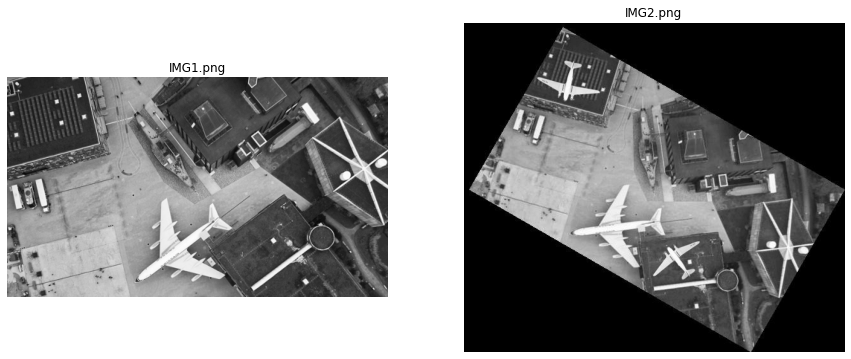

In [80]:
#Reading Images and Displaying them
img1=cv2.imread("IMG1.png",0)
img2=cv2.imread("IMG2.png",0)
fig = plt.figure(figsize=(15, 12))
fig.add_subplot(1, 2, 1)
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.title("IMG1.png")
fig.add_subplot(1, 2, 2)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.title("IMG2.png")

In [5]:
c_points=np.array([[29, 124], [157, 372]])
points=np.array([[93, 248], [328, 399]])

In [6]:
#Computing the A matrix 
def Amat(points,c_points):
    n=len(points)
    Amatrix=np.zeros((2*n,5))
    for i in range(n):
        x,y=points[i]
        x_p,y_p=c_points[i]
        Amatrix[2*i]=[x, y, 1, 0, -x_p]
        Amatrix[2*i+1]=[y, -x, 0, 1, -y_p]
    return Amatrix

In [7]:
def H(A): # Computing Homography matrix H
    A_t=np.transpose(A)
    val=np.matmul(A_t,A)
    u, s, v= np.linalg.svd(val)
    return v[-1]   

In [82]:
e=H(Amat(points,c_points))
h=np.zeros((3,3))
h[0,0]=e[0]
h[0,1]=e[1]
h[0,2]=e[2]
h[1,0]=-e[1]
h[1,1]=e[0]
h[1,2]=e[3]
h[2,2]=e[4]
#Rearranging the e vector to build the H matrix

In [9]:
Hinverse=np.linalg.inv(h)# Calculating the H inverse for Target to source mapping

In [81]:
x, y = np.shape(img2)
image = np.zeros((x+2, y+2))
image[1:-1, 1:-1] = img2

In [11]:
x, y = np.shape(img2)
img3=np.zeros_like(img2)

for i in range(x):
    for j in range(y):
        destination=np.array([i,j,1])
        xs,ys,d=np.matmul(Hinverse,destination) # Multiplying with H inverse to map it back to source
        if d!=0:
            xs=xs/d
            ys=ys/d
        else:
            xs=0
            ys=0
        
        xf,yf=m.floor(xs),m.floor(ys)
        a=xs-xf
        b=ys-yf
        if xf>=0 and xf<x-1 and yf>=0 and yf<y-1:
            img3[i,j]=(1-a)*(1-b)*image[xf,yf]+ (1-a)*b*image[xf,yf+1]+ a*(1-b)*image[xf+1,yf]+a*b*image[xf+1,yf+1]#Bilinear-Interpolation
        else:
            img3[i,j]=0
        

Text(0.5, 1.0, 'Rectified Image')

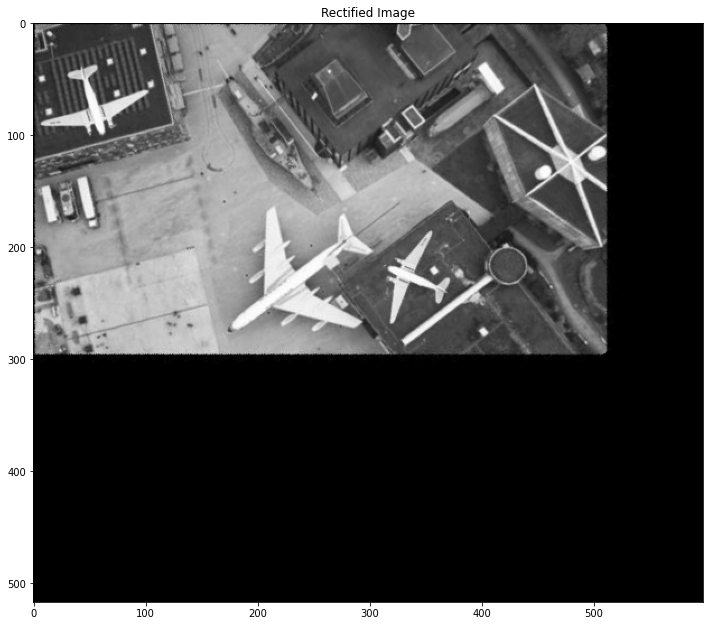

In [83]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(img3,cmap="gray")
plt.title("Rectified Image")

Text(0.5, 1.0, 'Cropped Image')

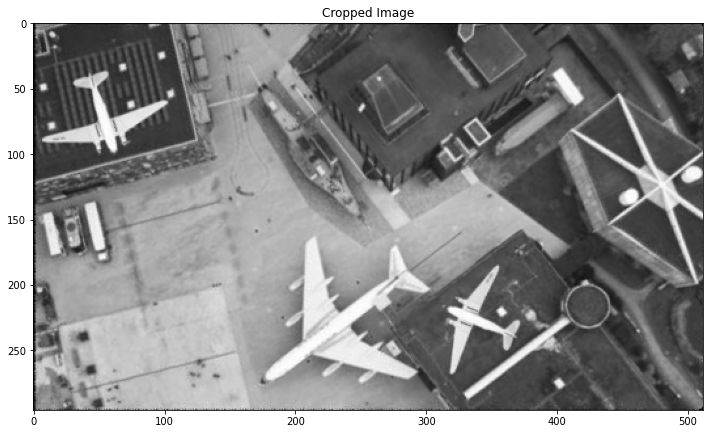

In [88]:
#Cropping the image
x,y=np.shape(img1)
cropped_image=img3[:x,:y]
fig = plt.figure(figsize=(12, 12))
plt.imshow(cropped_image,cmap="gray")
plt.title("Cropped Image")

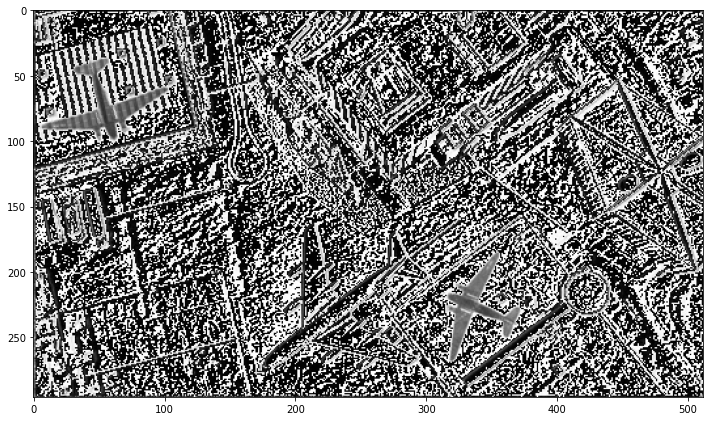

In [85]:
diffrence=(img1-cropped_image) 
diffrence=diffrence/np.max(diffrence) #Normalizing
fig = plt.figure(figsize=(12, 12))
plt.imshow(diffrence,cmap="gray")

####  Simply plotting the diffrence image isn't giving a idea about the changes. So I applied a binary mask and that improved the visualization of changes.

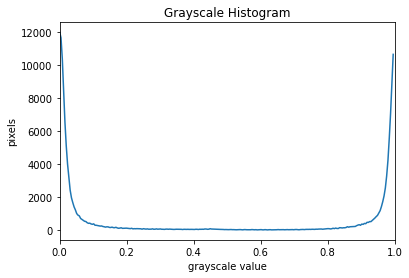

In [86]:
histogram, bin_edges = np.histogram(diffrence, bins=256, range=(0.0, 1.0)) #Plotting a histogram to have a better sense of pixels and its distribution

plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

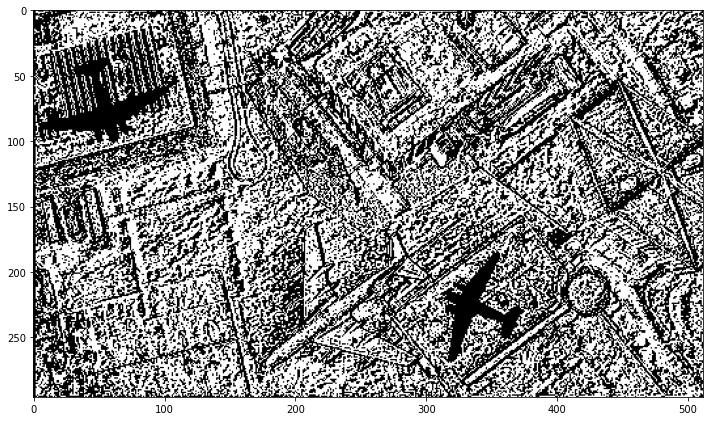

In [87]:
t = 0.1
binary_mask = diffrence < t

fig = plt.figure(figsize=(12, 12))
plt.imshow(binary_mask, cmap='gray')
plt.show()